In [1]:
# code in waterwaves.wave
import numpy as np
import matplotlib.pyplot as plt

from scipy.optimize import root
from scipy.interpolate import make_interp_spline as mis

from waterwaves.start import linear # these are relativized in package
from waterwaves.display import eta,Ej,extract,QR
from waterwaves.grids import grids
from waterwaves.boundary import F
from waterwaves.parameters import Hmx_d,Hmx_0,d_L,Hmx_L
from waterwaves.wave import wave,wave_base

import os
L_d=int(os.environ['JPY_SESSION_NAME'][-9:-6])

from IPython.display import display, Math
display(Math(f'\\lambda/d={L_d}'))

<IPython.core.display.Math object>

False


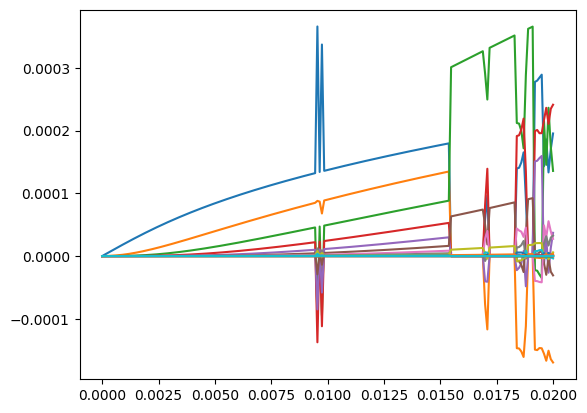

[True, True, True, True, True, True, True, True, True, True]

In [2]:
Nc=20 # number of dominant components
H=np.linspace(0,0.02,200)

d=2*np.pi/L_d
SOL=wave_base(Nc,H,L_d)

Ej(H,SOL)
#plt.legend()
print(np.all(extract(SOL,'success')))
plt.show()
extract(SOL[:10],'success')

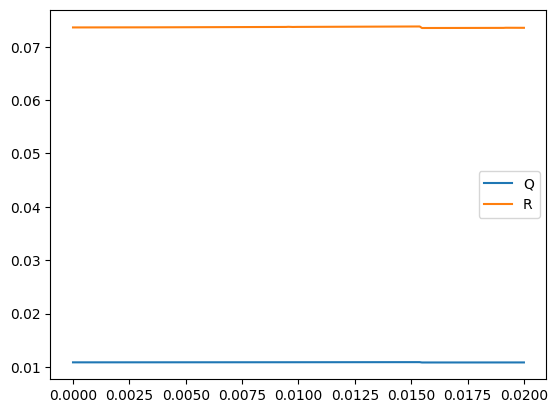

In [3]:
QR(H,SOL)
plt.legend()
plt.show()

In [4]:
Nf=10
def refine(Nc,Hp,L_d,fs=lambda x:None):
    BASE=wave_base(Nc,Hp,L_d,fs=fs)
    print(extract(BASE,'success'))
    return BASE

In [5]:
Hp=np.linspace(0,0.015,Nf) # interpolation points
BASE=refine(Nc,Hp,L_d)
fs=mis(Hp,extract(BASE,'x'),k=min(len(Hp)-1,3))

[True, True, True, True, True, True, True, True, True, True]


In [6]:
Hp=np.linspace(0,0.03,2*Nf) # interpolation points
BASE=refine(Nc,Hp,L_d,fs=fs)
fs=mis(Hp,extract(BASE,'x'),k=min(len(Hp)-1,3))

[True, False, False, False, False, False, False, False, True, True, True, True, True, True, True, True, True, True, True, True]


/home/mike/Documents/github/modwaves/development/waterwaves/boundary.py:11: RuntimeWarning: overflow encountered in cosh
  return C(Etamj)/g.scl,S(Etamj)/g.scl,Etam
/home/mike/Documents/github/modwaves/development/waterwaves/boundary.py:11: RuntimeWarning: overflow encountered in sinh
  return C(Etamj)/g.scl,S(Etamj)/g.scl,Etam
/home/mike/Documents/github/modwaves/development/waterwaves/boundary.py:27: RuntimeWarning: invalid value encountered in multiply
  Vm=((SEmj*g.SXmj))@(g.j*Bj)


In [7]:
Hp=np.linspace(0,0.075,Nf) # interpolation points
BASE=refine(Nc,Hp,L_d,fs=fs)
fs=mis(Hp,extract(BASE,'x'),k=min(len(Hp)-1,3))

[True, False, True, True, True, True, True, True, True, True]


In [8]:
Hp=np.linspace(0,0.15,Nf) # interpolation points
BASE=refine(Nc,Hp,L_d,fs=fs)
fs=mis(Hp,extract(BASE,'x'),k=min(len(Hp)-1,3))

[True, True, True, True, True, True, True, True, True, True]


In [9]:
Hp=np.linspace(0,0.4,Nf) # interpolation points
BASE=refine(Nc,Hp,L_d,fs=fs)
fs=mis(Hp,extract(BASE,'x'),k=min(len(Hp)-1,3))

[True, True, True, True, True, True, True, True, True, True]


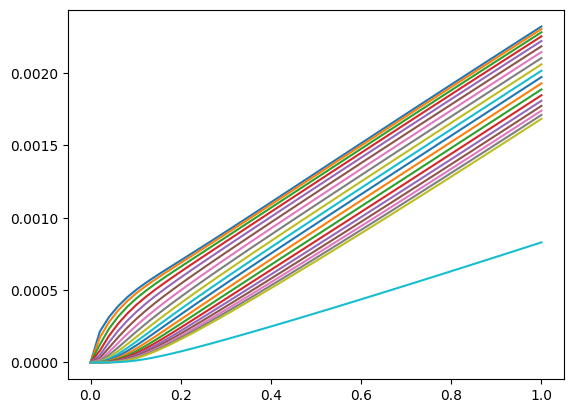

In [10]:
H=np.linspace(0,1)
SOL=wave_base(Nc,H,L_d,fs) # spline start settles Fourier components versus h=H/Hmx
Ej(H,SOL)

True


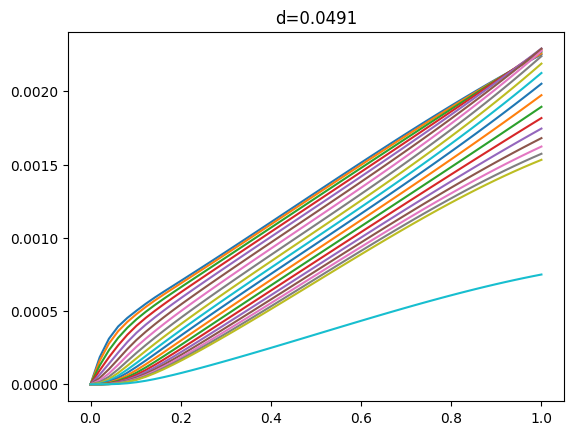

In [11]:
plt.plot(H,fs(H)[:,:-2],label=[f'$fs_{j}$' for j in range(1,Nc+1)])
#plt.legend()
plt.title(f'd={d:6.4f}')
print(np.any(extract(SOL,'success')))
plt.show()

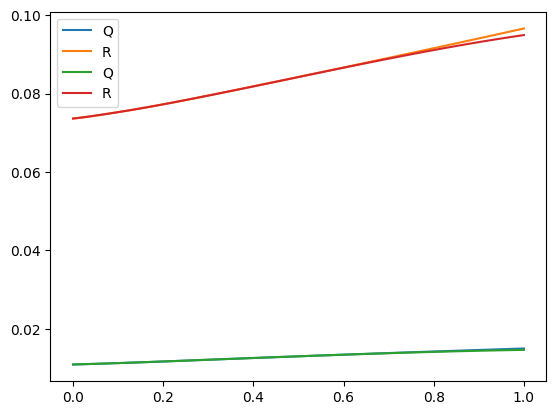

In [12]:
QR(H,SOL) # and Q,R
plt.plot(H,fs(H)[:,-2:],label=['Q','R'])
plt.legend()
plt.show()

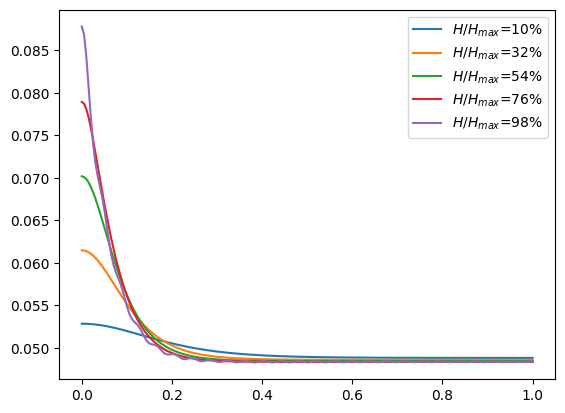

In [13]:
for h in np.linspace(0.1,0.98,5):
    X=np.linspace(0,1,200)
    Hs=h*Hmx_L(L_d)*2*np.pi
    N=160
    cooke=wave(N,Hs,L_d,A0=fs(h))
    labstr='$H/H_{max}$='
    eta(X,d,cooke,labstr+f'{h:.0%}')
    if not cooke.success:
        print(cooke.message)
plt.legend()
plt.show()

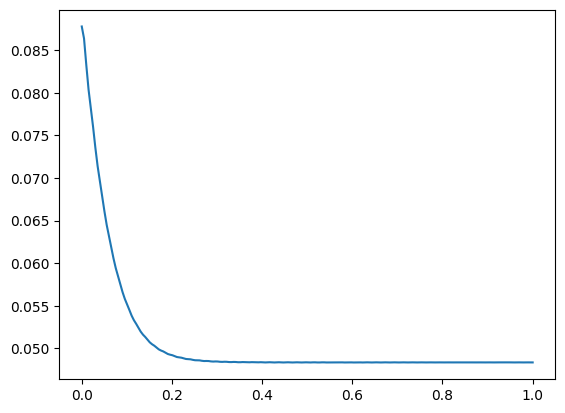

In [14]:
N=320
cooke=wave(N,Hs,L_d,A0=fs(h))
labstr='$H/H_{max}$='
eta(X,d,cooke,labstr+f'{h:.0%}')
if not cooke.success:
    print(cooke.message)